In [15]:
# import the dataset and do the data preprocessing

In [ ]:
#problem statement
# Develop a sentiment analysis model to classify reviews as positive or negetive.
#preprocess the review text using techniques such as lower casting,removing stop words and lemmatization
# use the trained model accuratly protect the sentiment

In [53]:
import pandas as pd

In [54]:
data=pd.read_csv('Reviews.csv')

In [55]:
print(data)

                                                Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


In [56]:
# we can reviw the top5 rows
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [57]:
#we can the top 10 rows
data.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [58]:
data.tail()    # last 5 rows

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [59]:
data.tail(10)   #last 10 rows

,Review,Liked
990,The refried beans that came with my meal were ...,0
991,Spend your money and time some place else.,0
992,A lady at the table next to us found a live gr...,0
993,the presentation of the food was awful.,0
994,I can't tell you how disappointed I was.,0
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [60]:
data.info() #dataset info like datatypes,entries of dataset and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [61]:
data.isnull().sum() # checking the null values

Review    0
Liked     0
dtype: int64

In [62]:
data.duplicated() #checking the duplicated data

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [63]:
from wordcloud import WordCloud 

In [64]:
combined_text=" ".join(data['Review']) #Combine all review text into one string
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(combined_text)

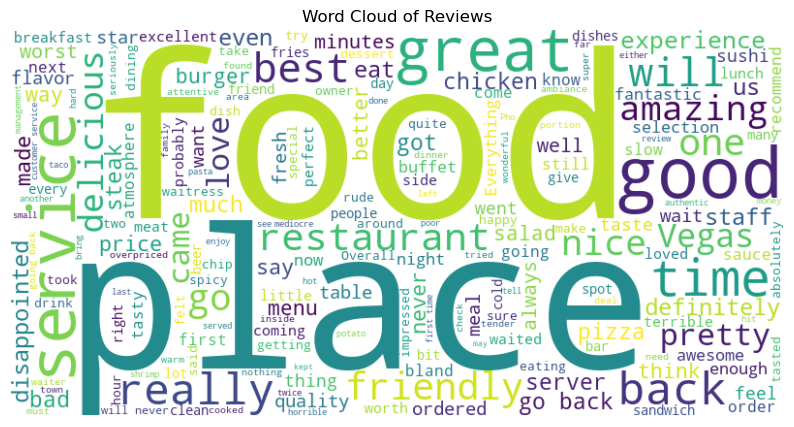

In [65]:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

In [66]:
from collections import Counter

In [67]:
targeted_words=['good','great','amazing','bad']
all_words=" ".join(data['Review']).lower().split()     #flattened reviews into a single list of words
word_counts=Counter(all_words)
target_word_count={word:word_counts[word] for word in targeted_words}


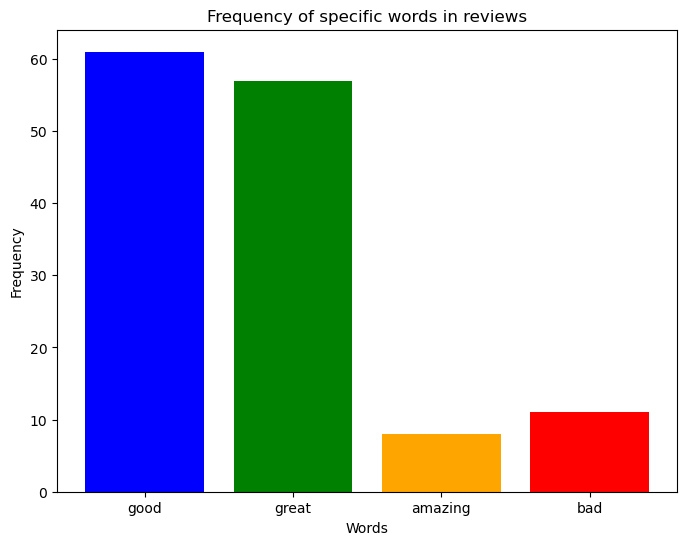

In [68]:
#plotting
plt.figure(figsize=(8,6))
plt.bar(target_word_count.keys(),target_word_count.values(),color=['blue','green','orange','red'])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency of specific words in reviews')
plt.show()

In [69]:
lowercases_text=data['Review'].str.lower()
print(lowercases_text)

0                               wow... loved this place.
1                                     crust is not good.
2              not tasty and the texture was just nasty.
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
                             ...                        
995    i think food should have flavor and texture an...
996                             appetite instantly gone.
997    overall i was not impressed and would not go b...
998    the whole experience was underwhelming, and i ...
999    then, as if i hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object


In [70]:
#tokenization
from nltk.tokenize import word_tokenize
import nltk

In [26]:
#Download the'punkt' tokenizer
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [71]:
data['Tokens'] = data['Review'].apply(word_tokenize)
print(data ['Tokens'] )


0                      [Wow, ..., Loved, this, place, .]
1                              [Crust, is, not, good, .]
2      [Not, tasty, and, the, texture, was, just, nas...
3      [Stopped, by, during, the, late, May, bank, ho...
4      [The, selection, on, the, menu, was, great, an...
                             ...                        
995    [I, think, food, should, have, flavor, and, te...
996                       [Appetite, instantly, gone, .]
997    [Overall, I, was, not, impressed, and, would, ...
998    [The, whole, experience, was, underwhelming, ,...
999    [Then, ,, as, if, I, had, n't, wasted, enough,...
Name: Tokens, Length: 1000, dtype: object


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
 2   Tokens  1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [73]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

In [37]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Venkatavaibhav\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [74]:
stop_words=set(stopwords.words('english'))
data['Tokens']=data['Review'].apply(lambda x:[word for word in word_tokenize(x) if word not in stop_words])
print(data['Tokens'])

0                            [Wow, ..., Loved, place, .]
1                                       [Crust, good, .]
2                        [Not, tasty, texture, nasty, .]
3      [Stopped, late, May, bank, holiday, Rick, Stev...
4               [The, selection, menu, great, prices, .]
                             ...                        
995        [I, think, food, flavor, texture, lacking, .]
996                       [Appetite, instantly, gone, .]
997          [Overall, I, impressed, would, go, back, .]
998    [The, whole, experience, underwhelming, ,, I, ...
999    [Then, ,, I, n't, wasted, enough, life, ,, pou...
Name: Tokens, Length: 1000, dtype: object


In [75]:
#stemming
from nltk.stem import PorterStemmer

In [76]:
Stemmer=PorterStemmer()
data['stemmed']=data['Review'].apply(lambda x:"".join([Stemmer.stem(word) for word in word_tokenize(x)]))
print(data['stemmed'])
data['stemmed'].value_counts()

0                                    wow...lovethiplace.
1                                        crustisnotgood.
2                       nottastiandthetexturwajustnasti.
3      stopbydurethelatemaybankholidayoffricksteverec...
4            theselectonthemenuwagreatandsoweretheprice.
                             ...                        
995    ithinkfoodshouldhaveflavorandtexturandbothwere...
996                                appetitinstantligone.
997                overaliwanotimpressandwouldnotgoback.
998    thewholeexperiwaunderwhelm,andithinkwe'lljustg...
999    then,asifihadn'twastenoughofmylifethere,theypo...
Name: stemmed, Length: 1000, dtype: object


stemmed
#name?                                                                                                  4
thefoodwaterribl.                                                                                       2
iwouldnotrecommendthiplace.                                                                             2
ilovethiplace.                                                                                          2
iwon'tbeback.                                                                                           2
                                                                                                       ..
omg,thefoodwadelicioso!                                                                                 1
thereisnothauthentaboutthiplace.                                                                        1
thespaghettiisnothspecialwhatsoev.                                                                      1
ofallthedish,thesalmonwathebest,butall

In [41]:
#Lemmatization
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Venkatavaibhav\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [77]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
lemmatizer=WordNetLemmatizer()
data['Lemmatized']=data['Review'].apply(lambda x:''.join([lemmatizer.lemmatize(word,pos=wordnet.VERB)for word in word_tokenize(x)]))
print(data['Lemmatized'])

0                                  Wow...Lovedthisplace.
1                                        Crustbenotgood.
2                      Nottastyandthetexturebejustnasty.
3      StoppedbyduringthelateMaybankholidayoffRickSte...
4           Theselectiononthemenubegreatandsobetheprice.
                             ...                        
995    Ithinkfoodshouldhaveflavorandtextureandbothbel...
996                                 Appetiteinstantlygo.
997               OverallIbenotimpressandwouldnotgoback.
998    Thewholeexperiencebeunderwhelming,andIthinkwe'...
999    Then,asifIhaven'twasteenoughofmylifethere,they...
Name: Lemmatized, Length: 1000, dtype: object


In [78]:
#removing the numbers
import re
data['No_Numbers']=data['Review'].apply(lambda x:re.sub(r'\d+','',x))
print(data['No_Numbers'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: No_Numbers, Length: 1000, dtype: object


In [79]:
data["cleaned_text"]=data['Review'].apply(lambda x:re.sub(r'[^A-Za-z0-9\s]','',x))
print(data["cleaned_text"])

0                                   Wow Loved this place
1                                      Crust is not good
2               Not tasty and the texture was just nasty
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                              Appetite instantly gone
997    Overall I was not impressed and would not go back
998    The whole experience was underwhelming and I t...
999    Then as if I hadnt wasted enough of my life th...
Name: cleaned_text, Length: 1000, dtype: object


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review        1000 non-null   object
 1   Liked         1000 non-null   int64 
 2   Tokens        1000 non-null   object
 3   stemmed       1000 non-null   object
 4   Lemmatized    1000 non-null   object
 5   No_Numbers    1000 non-null   object
 6   cleaned_text  1000 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB


In [36]:
pip install contractions

Note: you may need to restart the kernel to use updated packages.


In [81]:
#normalization
import contractions
data['Expanded'] = data['Review'].apply(contractions.fix)
print(data['Expanded'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I had not wasted enough of my life...
Name: Expanded, Length: 1000, dtype: object


In [3]:
pip install emoji

   ---------------------------------------- 0.0/431.4 kB ? eta -:--:--
    --------------------------------------- 10.2/431.4 kB ? eta -:--:--
   -- ------------------------------------ 30.7/431.4 kB 435.7 kB/s eta 0:00:01
   ----- --------------------------------- 61.4/431.4 kB 656.4 kB/s eta 0:00:01
   ------------------ --------------------- 204.8/431.4 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------  430.1/431.4 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 431.4/431.4 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [82]:
import emoji
data['Emoji'] = data['Review'].apply(emoji.demojize)
print(data['Emoji'])


0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Emoji, Length: 1000, dtype: object


In [3]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [83]:
from bs4 import BeautifulSoup
data['Cleaned'] = data['Review'].apply(lambda x: BeautifulSoup(x,"html.parser").get_text())
print(data['Cleaned'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Cleaned, Length: 1000, dtype: object


C:\Users\Venkatavaibhav\AppData\Local\Temp\ipykernel_10064\4263549124.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['Cleaned'] = data['Review'].apply(lambda x: BeautifulSoup(x,"html.parser").get_text())


In [44]:
#TF -IDF VECTORIZER
#TF = TERM FREQUENCY,IDF = INVERSE DOCUMENT FREQUENCY

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()

In [89]:
X = vectorizer.fit_transform(data['Review'])
print(X.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [95]:
#Building the machine learning model
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report

In [96]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['Review'])
y = data['Liked']

In [99]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [100]:
print(X_train,X_test,y_train,y_test)

  (0, 1527)	0.578582388550776
  (0, 1516)	0.5587881819736206
  (0, 2005)	0.45560954528848707
  (0, 1938)	0.20794801889277578
  (0, 1778)	0.3196494189359375
  (1, 711)	0.4193390530637025
  (1, 622)	0.4193390530637025
  (1, 1180)	0.3554925882290983
  (1, 613)	0.32026666852400937
  (1, 1471)	0.272554926639921
  (1, 62)	0.5164170315313602
  (1, 263)	0.27998403419950374
  (2, 1057)	0.5102287539842273
  (2, 1962)	0.48790050997574835
  (2, 699)	0.3031291394604372
  (2, 1618)	0.5102287539842273
  (2, 1571)	0.3198299691276987
  (2, 1938)	0.21704341786509082
  (3, 1723)	0.4538927163856403
  (3, 1852)	0.42838721919777234
  (3, 719)	0.30305480231081033
  (3, 1791)	0.3192733609259723
  (3, 821)	0.37508854376741335
  (3, 590)	0.33614831815132157
  (3, 1471)	0.29501353406759745
  :	:
  (797, 1796)	0.2155139089210878
  (798, 649)	0.34296597014320795
  (798, 787)	0.34296597014320795
  (798, 17)	0.34296597014320795
  (798, 406)	0.32369375609078
  (798, 18)	0.34296597014320795
  (798, 122)	0.342965970143

In [101]:
model=MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [105]:
y_pred=model.predict(X_test)

In [108]:
accuracy= accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)

In [109]:
print(f'Accuracy:{accuracy}')
print('Classification Report')
print(report)

Accuracy:0.8
Classification Report
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        96
           1       0.85      0.75      0.80       104

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.81      0.80      0.80       200



In [110]:
#prediction sentiment fro new review
def predict_sentiment(new_review):
    cleaned_review=preprocess_text(new_review)
    X_new = vectorizer.transform([cleaned_review])
    return model.predict(X_new)[0]

In [ ]:
new_reviews= input("enter a review:")

In [ ]:
for review in new_reviews:
    sentiment = predict_sentiment(review)
    sentiment_label='Positive' if sentiment ==1 else "Negative"
    print(f"Review:'{review}' \n